<a href="https://colab.research.google.com/github/KLeeDE/Data-Science/blob/master/(Assignment%2001)%20When%20will%20New%20Castle%20Battery%20Park%20be%20underwater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSTEP20 // Assignment #1

assigned : **Jan 7, 2020**

DUE : **Jan 14, 2020 11:59pm**

## When will New Castle Battery Park be underwater?

![alt text](https://lh5.googleusercontent.com/p/AF1QipNu7_-CRmvQTqI7m_V693kOu_IzeeDVYw2Do2UT=w408-h306-k-no)

---

**READING**

You won't be quizzed or tested on readings for this class, but they can be invaluable for learning through example how to think, write, and reason like a Data Scientist!

1. [CMU Metro 21 Project with Pittsburgh Bureau of Fire Report](http://michaelmadaio.com/Metro21_FireRisk_FinalReport.pdf) - especially the Executive Summary.

2. The [first](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/) and [second](https://jakevdp.github.io/blog/2015/07/23/learning-seattles-work-habits-from-bicycle-counts/) blog posts about bike share usage in Seattle from Jake van der Plas's *Pythonic Perambulations* blog. <br> **NOTE: the goal here is not to understand all of the python code, but rather to get a sense of what data storytelling is and the kinds of language and inferential thinking used in data science.**


---

### OVERVIEW

Sea level has been on the rise for at least 100 years, and as the climate changes and the Earth warms, the rate of that rise has been an active area of study given the potential consequences if sea level is strongly affected.

Measurements of sea level mostly come in two flavors, satellites and tide gauges.  The satellite measurements are primarily accomplished by firing radio waves towards the ocean surface and waiting for the time it takes for those radio waves to bounce back and return to the satellite.  Since we know how fast light (radio waves are a form of light) travels, the distance from the satellite to the surface is just the bounce back time divided by the speed of light.  [TOPEX/Poseidon](https://en.wikipedia.org/wiki/TOPEX/Poseidon) has been one of the most successful satellite missions for these altimetry measurements of the ocean surface.  [Tide gauges](https://en.wikipedia.org/wiki/Tide_gauge), on the other hand, are ground-based measurements that directly measure the height of water relative to a stationary device.  They are less accurate, provide significantly reduced spatial and temporal coverage, but prior to satellite altimetry, were the only real method for measuring sea level. 

There are three main goals of this assignment:

1. accessing and working with a century of sea level data
2. fitting linear models to that data for estimates of the rate of sea level rise
3. comparing multiple models for prediction of future sea level

<u>**Instructions for tasks that will be graded are in bold below.**</u>

### PART 1 - Background

Good data science (and data analysis more generally) depends on a clear understanding of the underlying problem/situation, the methods by which the data you are about to analyze are collected, and the situational context in which that data sits.  To that end:

<b>
Provide a brief (no more than 500 words) descriptive overview of sea level rise, including its historical significance, context within a changing climate, and projections for the future.  Potential topics to consider and address include:

1. description of historical sea level measurements
  
2. what open satellite data exist and where they can be located

3. characteristic numbers for sea level measurements over time

4. why sea level might change as the climate changes

5. variation in sea level rise across the globe

6. what projections exist for the future of sea level rise

7. how coastal communities are mitigating the consequences of sea level rise

8. potential economic costs of sea level rise

9. potential social costs of sea level rise

Please include *references* within the description via weblinks (like the TOPEX/Poseidon link in the Overview in the cell above).
</b>

In [0]:
# Answer the Background Questions below.  

**1. Description of historical sea level measurements**
Sea level has been changed and raised ‘observationally’ for at least 100 years and the sea level measurements have been changed in history. According to the  [Intergovernmental Panel on Climate Change (IPCC)](https://en.wikipedia.org/wiki/Intergovernmental_Panel_on_Climate_Change), “the instrumental record of sea level change is mainly comprised of tide gauge measurements over the past two to three centuries and, since the early 1990s, of satellite-based radar altimeter measurements” [(IPCC, 2014)](https://www.ipcc.ch/site/assets/uploads/2018/02/WG1AR5_Chapter13_FINAL.pdf). In 18 century, the sea level observations come from tide gauge records [(Gornitz, 1995)](https://link.springer.com/article/10.1007/BF01095160). As the technology has been developed, the sea level measurements has been changed to using satellite, specifically [TOPEX/Poseidon](https://en.wikipedia.org/wiki/TOPEX/Poseidon) is known as the first major oceanographic research satellite launched by US and France 1992. 

**2. What open satellite data exist and where they can be located**
The satellite data can be found in public sector, private sector, academia, and individual sources.  In order to address different aspects of sea level change, the ‘open’ satellite data can be useful sources in terms of accessibility. The sea level data are measured by satellites which are owned by government; therefore, the data can be usually found in the public sector. In case of measuring the sea level, the open data measured by TOPEX/Poseidon or others can be usually found in the public open data source such as [U.S. Government Open Data Portal](https://catalog.data.gov/dataset/sea-level-topex-poseidon), or [NASA’s Open Data Portal](https://data.nasa.gov/Earth-Science/SEA-LEVEL-TOPEX-POSEIDON-/fxn4-cuhe). 

**3. Characteristic numbers for sea level measurements over time**
The characteristic numbers for sea level measurements are changed over time.  [Cazenave and Nerem (2004)](https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1029/2003RG000139) estimated that “the geocentric rate of global mean sea level rise over the last decade (1993-2003) is known to be +2.8±0.4 mm/yr” by using the TOPEX/Poseidon and Jason altimeter measurements. However, the characteristic numbers for sea level measurements has been changed up to 0.8 mm/yr sea level rise because of thermal expansion and total ice melting during 1990s. [Nerem et al. (2010)](https://www.tandfonline.com/doi/full/10.1080/01490419.2010.491031) also found that “the average rate of sea level rise from 1993-2009 is 3.4±0.4 mm/yr” by using the TOPEX/Poseidon and Jason-1 and 2 satellite altimeter missions. [Nerem and Mitchum (2002)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2002GL015037) also found that the rate of vertical crustal motion from differences of sea level measurements made by the TOPEX/Poseidon radar altimeter and a globally distributed network of 114 tide gauges are approximately 1-2 mm/yr, which is sufficiently accurate to detect a geophysical phenomenon. Based on the previous research, the characteristic numbers for sea level measurements are found to be changed by time, even the measurements are same. 

**4. Why sea level might change as the climate changes**
The previous research found that sea level changes as climate changes. The global climate change is expected to affect rate of rising sea level [(Michener et al., 1997)](https://esajournals.onlinelibrary.wiley.com/doi/full/10.1890/1051-0761%281997%29007%5B0770%3ACCHATS%5D2.0.CO%3B2). Afterwards, [Cazenave and Nerem (2004)](https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1029/2003RG000139) stated that “changes in the rate of sea level rise are intimately related to changes in the Earth’s climate”.  It is because the climate change alters the volume of water in the global ocean and atmosphere and it caused the global mean sea level change [(Bindoff et al., 2007)](http://nora.nerc.ac.uk/id/eprint/15400/). Therefore, the sea level rise and climate change are closely related, and climate change is expected to affect the rate of sea level rise to be increased. 

**5. Variation in sea level rise across the globe**
The variation in sea level across the globe is reported to be increased continuously in history. The previous research found that the global average sea level rise using satellite data and found that it rises during 1880-2009 about 210 mm. It shows statistically significant acceleration since 1880 and considerable variability in the rate of rise during the twentieth century [(Church and White, 2011)](https://link.springer.com/article/10.1007/s10712-011-9119-1?version=meter+at+null&module=meter-Links&pgtype=article&contentId=&mediaId=&referrer=&priority=true&action=click&contentCollection=meter-links-click%23CR23).  Accordingly, the IPCC’s [Fifth Assessment Reports (AR5)](https://en.wikipedia.org/wiki/IPCC_Fifth_Assessment_Report) estimated that “the global average sea level has continued to increase since the early 20th century, with estimates that range from 0.000 [-0.002 to 0.002] mm yr 2 to 0.013 [0.007 to 0.019] mm yr-2” [(IPCC, 2014)](https://www.ipcc.ch/site/assets/uploads/2018/02/WG1AR5_Chapter13_FINAL.pdf). Hence, it is significantly apparent that the global average sea level keeps increasing.   

**6. What projections exist for the future of sea level rise**
Scientists estimated the projected contributions to global mean sea level and suggested projections of global mean sea level rise. According to the IPCC, AR5 mentioned that “it is very likely that the rate of global mean sea level rise during the 21st century will exceed the rate observed during 1971-2010 for all Representative Concentration Pathway (RCP) scenarios due to increase in ocean warming and loss of mass from glaciers and ice sheets” [(IPCC, 2014)](https://www.ipcc.ch/site/assets/uploads/2018/02/WG1AR5_Chapter13_FINAL.pdf). The IPCC’s projections are larger than what it was reported in the Fourth Assessment Report (AR4). In the future by 2100, “the global mean sea level rise is projected to be around 0.1 meter lower with global warming of 1.5°C compared to 2°C (medium confidence) and seal level will continue to rise well beyond 2100”  [(IPCC, 2018).](https://www.ipcc.ch/sr15/chapter/spm/) As a result, the sea level is expected to rise continuously and more rapidly than the current level.

**7. How coastal communities are mitigating the consequences of sea level rise**
As the sea level rise is apparent, it can give deleterious impacts to coastal communities. [Gornitz (1995)](https://link.springer.com/article/10.1007/BF01095160) stated that the future sea level rise can give malicious impacts to coastal regions such as the loss of land through inundation and erosion, increased frequency of storm floods, saltwater intrusion, and greater amounts of waterlogging. Therefore, the coastal communities have been putting efforts to mitigate the short-term and long-term consequences of sea level rise.  [Hurlimann et al. (2014)](https://www.sciencedirect.com/science/article/pii/S0169204613002442) addressed that the communities can mitigate the sea level rise by facilitating local ownership of adaptation responses, building collective action within local communities and between local communities and different level of government, and being fair in its application across space and over time. 

**8. Potential economic costs of sea level rise**
The sea level rise potentially increases economic costs of sea level rise to the coastal communities and government. The economic costs had been estimated by the expenditures within the total costs associated with raised sea levels induced by climate change [(Frankhauser, 1995)](https://journals.sagepub.com/doi/abs/10.1068/a270299), and then it is currently using the [damage-cost functions](https://www.epfl.ch/labs/gemini-e3/wp-content/uploads/2018/08/Integrating-impacts-of-climate-change-in-GEMINI-E3) associated with a sea-level. Bosello et al. (2007) also estimated that the coastal economies that rely most on agriculture are hit hardest in 2050, while GDP increases, energy prices rise, energy consumption falls, but the costs of full protection exceed the costs of losing land.  The categories of economic costs are usually found to be the land loss and tourism such as beach erosion. [Bosello et al. (2012)](https://link.springer.com/article/10.1007/s10584-011-0340-1) found that not only coastal countries, but also landlocked countries will be lost 0.003% of GDP because of sea level rise. [Letherman (2001)](https://www.sciencedirect.com/science/article/pii/S0074614201800115) estimated that small islands as well as 80-90% of the U.S. sandy beaches are currently on erosion and the cost of restoration requires high economic costs. 

**9. Potential social costs of sea level rise**
Not only the economic costs of sea level rise, but also the social costs of sea level rise should be considered in the policy making process. The main social impact of sea level rise is forced migration [(Burdett, 2019)](https://geographycasestudysite.wordpress.com/societal-impacts-of-climate-change-sea-level-rise/). [Friedlander (2017)](https://news.cornell.edu/stories/2017/06/rising-seas-could-result-2-billion-refugees-2100) estimated that 2 billion people may have had to migrate by 2100. The 13 million people in U.S.A. might have to migrate by 2100 [(Dunham, 2016)](https://www.reuters.com/article/us-climatechange-usa/sea-level-rise-projected-to-displace-13-million-in-u-s-by-2100-idUSKCN0WG1VW). Therefore, sea level rise can bring the deleterious societal problems such as international migration and it is even worse in terms of ‘justice’ since the most affected countries are classified as poor countries which show low GDP in the world. The problems of losing communities, causing forced migrations and facing inevitable huge societal change are regarded as the potential social costs of sea level rise.   

**References:**

***Journal/Report***

Bindoff, N. L., Willebrand, J., Artale, V., Cazenave, A., Gregory, J. M., Gulev, S., ... & Shum, C. K. (2007). Observations: oceanic climate change and sea level. 

Bosello, F., Roson, R., & Tol, R. S. (2007). Economy-wide estimates of the implications of climate change: Sea level rise. Environmental and Resource Economics, 37(3), 549-571. Bosello, F., Nicholls, R. J., Richards, J., Roson, R., & Tol, R. S. (2012). Economic impacts of climate change in Europe: sea-level rise. Climatic change, 112(1), 63-81.

Cazenave, A., & Nerem, R. S. (2004). Present‐day sea level change: Observations and causes. Reviews of Geophysics, 42(3). Retrieved from: 

Church, J. A., & White, N. J. (2011). Sea-level rise from the late 19th to the early 21st century. Surveys in geophysics, 32(4-5), 585-602.

Fankhauser, S. (1995). Protection versus retreat: the economic costs of sea-level rise. Environment and Planning A, 27(2), 299-319.

Gornitz, V. (1995). Monitoring sea level changes. Climatic Change, 31(2-4), 515-544.

Hurlimann, A., Barnett, J., Fincher, R., Osbaldiston, N., Mortreux, C., & Graham, S. (2014). Urban planning and sustainable adaptation to sea-level rise. Landscape and Urban Planning, 126, 84-93.

IPCC, 2014: Climate Change 2014: Synthesis Report. Contribution of Working Groups I, II and III to the Fifth Assessment Report of the Intergovernmental Panel on Climate Change [Core Writing Team, R.K. Pachauri and L.A. Meyer (eds.)]. IPCC, Geneva, Switzerland.

IPCC, 2018: Summary for Policymakers. In: Global Warming of 1.5°C. An IPCC Special Report on the impacts of global warming of 1.5°C above pre-industrial levels and related global greenhouse gas emission pathways, in the context of strengthening the global response to the threat of climate change, sustainable development, and efforts to eradicate poverty [Masson-Delmotte, V., P. Zhai, H.-O. Pörtner, D. Roberts, J. Skea, P.R. Shukla, A. Pirani, W. Moufouma-Okia, C. Péan, R. Pidcock, S. Connors, J.B.R. Matthews, Y. Chen, X. Zhou, M.I. Gomis, E. Lonnoy, T. Maycock, M. Tignor, and T. Waterfield (eds.)]. World Meteorological Organization, Geneva, Switzerland, 32 pp. 

Leatherman, S. P. (2001). Social and economic costs of sea level rise. In International Geophysics (Vol. 75, pp. 181-223). Academic Press.

Michener, W. K., Blood, E. R., Bildstein, K. L., Brinson, M. M., & Gardner, L. R. (1997). Climate change, hurricanes and tropical storms, and rising sea level in coastal wetlands. Ecological Applications, 7(3), 770-801.

Nerem, R. S., & Mitchum, G. T. (2002). Estimates of vertical crustal motion derived from differences of TOPEX/POSEIDON and tide gauge sea level measurements. Geophysical Research Letters, 29(19), 40-1.

Nerem, R. S., Chambers, D. P., Choe, C., & Mitchum, G. T. (2010). Estimating mean sea level change from the TOPEX and Jason altimeter missions. Marine Geodesy, 33(S1), 435-446.

***Website***

Burdett, Matt (2018, April 10) Societal impacts of climate change: Sea level rise. Retrieved from: https://geographycasestudysite.wordpress.com/societal-impacts-of-climate-change-sea-level-rise/

Dunham, Will (2016, March 14) Sea level rise projected to displace 13 million in U.S. by 2100. Retrieved from: https://www.reuters.com/article/us-climatechange-usa/sea-level-rise-projected-to-displace-13-million-in-u-s-by-2100-idUSKCN0WG1VW

Friedlander, Blaine (2017, June 19) Rising seas could result in 2 billion refugees by 2100. Retrieved from: https://news.cornell.edu/stories/2017/06/rising-seas-could-result-2-billion-refugees-2100

Intergovernmental Panel on Climate Change. (2020, January 14). In Wikipedia. Retrieved from:
https://en.wikipedia.org/wiki/Intergovernmental_Panel_on_Climate_Change

IPCC Fifth Assessment Report. (2020, January 14). In Wikipedia. Retrieved from: 
https://en.wikipedia.org/wiki/IPCC_Fifth_Assessment_Report

NASA Open Data Portal. https://data.nasa.gov/Earth-Science/SEA-LEVEL-TOPEX-POSEIDON-/fxn4-cuhe

TOPEX/POSEIDON. (2020, January 14). In Wikipedia. Retrieved from: https://en.wikipedia.org/wiki/TOPEX/Poseidon

U.S. Government Open Data Portal. https://catalog.data.gov/dataset/sea-level-topex-poseidon


### PART 2 - Loading and plotting the data

The NOAA data covers roughly 30 years of sea level changes, but there are data that go back further that are available from CSIRO (Commonwealth Scientific and Industrial Research Organization).  Descriptions of aggregated historical data from CSIRO can be found [here](https://research.csiro.au/slrwavescoast/sea-level/measurements-and-data/) and in the associated links.  The data we'll be using is available as a [CSV](https://datahub.io/core/sea-level-rise/r/epa-sea-level.csv) -- but please see the documentation and caveats associated with it in the README at the bottom of [this](https://datahub.io/core/sea-level-rise) page.

<b>Read in the CSIRO data from the link above labeled CSV.</b>

In [0]:
import pandas as pd
fname = "https://datahub.io/core/sea-level-rise/r/epa-sea-level.csv"
datahub = pd.read_csv(fname)
print(datahub)


           Year  ...  NOAA Adjusted Sea Level
0    1880-03-15  ...                      NaN
1    1881-03-15  ...                      NaN
2    1882-03-15  ...                      NaN
3    1883-03-15  ...                      NaN
4    1884-03-15  ...                      NaN
..          ...  ...                      ...
130  2010-03-15  ...                 8.122973
131  2011-03-15  ...                 8.053065
132  2012-03-15  ...                 8.457058
133  2013-03-15  ...                 8.546648
134  2014-03-15  ...                 8.663700

[135 rows x 5 columns]


<b>Take the <u>minimum</u> across the "CSIRO Adjusted Sea Level" and "NOAA Adjusted Sea Level" colmuns and add it to the DataFrame as a column called "min_level".</b>

In [0]:
datahub["min_level"] = datahub[datahub.columns[1:5]].min(axis=1)
print(datahub)


           Year  CSIRO Adjusted Sea Level  ...  NOAA Adjusted Sea Level  min_level
0    1880-03-15                  0.000000  ...                      NaN  -0.952756
1    1881-03-15                  0.220472  ...                      NaN  -0.732283
2    1882-03-15                 -0.440945  ...                      NaN  -1.346457
3    1883-03-15                 -0.232283  ...                      NaN  -1.129921
4    1884-03-15                  0.590551  ...                      NaN  -0.283465
..          ...                       ...  ...                      ...        ...
130  2010-03-15                  8.901575  ...                 8.122973   8.122973
131  2011-03-15                  8.964567  ...                 8.053065   8.053065
132  2012-03-15                  9.326772  ...                 8.457058   8.457058
133  2013-03-15                  8.980315  ...                 8.546648   8.546648
134  2014-03-15                       NaN  ...                 8.663700   8.663700

[13

<b>The CSIRO sea level data is in inches.  Convert the min_level column to millimeters.</B>

In [0]:
datahub["minlev_mm"] = datahub["min_level"] * 25.4
minlev_mm = datahub["minlev_mm"]
print(datahub)

           Year  CSIRO Adjusted Sea Level  ...  min_level   minlev_mm
0    1880-03-15                  0.000000  ...  -0.952756  -24.200000
1    1881-03-15                  0.220472  ...  -0.732283  -18.600000
2    1882-03-15                 -0.440945  ...  -1.346457  -34.200000
3    1883-03-15                 -0.232283  ...  -1.129921  -28.700000
4    1884-03-15                  0.590551  ...  -0.283465   -7.200000
..          ...                       ...  ...        ...         ...
130  2010-03-15                  8.901575  ...   8.122973  206.323503
131  2011-03-15                  8.964567  ...   8.053065  204.547851
132  2012-03-15                  9.326772  ...   8.457058  214.809264
133  2013-03-15                  8.980315  ...   8.546648  217.084865
134  2014-03-15                       NaN  ...   8.663700  220.057990

[135 rows x 7 columns]


Notice that the CSIRO time data is actually a string and includes months and dates.  **Use the cell below to create a column called "year_int" that is the CSIRO year as an integer so that we don't have to worry about the months and dates from now on.**

In [0]:
datahub["year_int"] = [int(i[:4]) for i in datahub["Year"]]
year_int = datahub["year_int"] 
print(datahub)

           Year  CSIRO Adjusted Sea Level  ...   minlev_mm  year_int
0    1880-03-15                  0.000000  ...  -24.200000      1880
1    1881-03-15                  0.220472  ...  -18.600000      1881
2    1882-03-15                 -0.440945  ...  -34.200000      1882
3    1883-03-15                 -0.232283  ...  -28.700000      1883
4    1884-03-15                  0.590551  ...   -7.200000      1884
..          ...                       ...  ...         ...       ...
130  2010-03-15                  8.901575  ...  206.323503      2010
131  2011-03-15                  8.964567  ...  204.547851      2011
132  2012-03-15                  9.326772  ...  214.809264      2012
133  2013-03-15                  8.980315  ...  217.084865      2013
134  2014-03-15                       NaN  ...  220.057990      2014

[135 rows x 8 columns]


**Make a plot of the sea-level as a function of time.**

Text(0, 0.5, 'Sea Level[mm]')

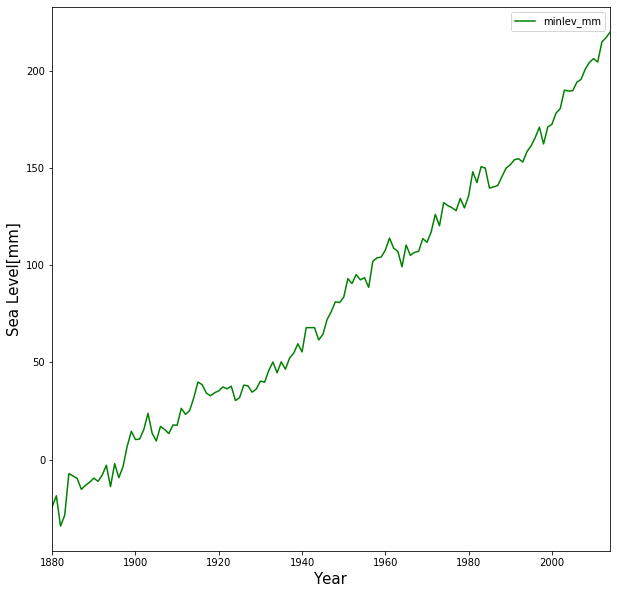

In [0]:
ax = datahub.plot("year_int", "minlev_mm", color="green", figsize=(10, 10))
ax.set_xlabel("Year", fontsize=15)
ax.set_ylabel("Sea Level[mm]", fontsize=15)

**Describe what information is conveyed by this plot.** <small> i.e, write a caption for the plot. </small>

The graph illustrates the sea level change between the years 1880 and 2000 at 20-year intervals. The horizontal axis (x-axis) shows years from 1880 to over 2000. The vertical axis (y-axis) represents sea level (millimeters). It can be seen that the sea level repeated increase and decrease in the shor term , while it continuously increased from 1880 in the long term. 





### PART 3 - Fitting a linear model

As we did in class, your goal here is to estimate the rate of sea level rise.  However, we now have a much longer <i>temporal baseline</i>.

<b>Using the statsmodels api, fit a linear model to the data:</b>

${\rm sea~level} = a_1 \times {\rm time} + a_0$

<b>What is the rate of sea level rise that you find with this linear model fit to the CSIRO data?</b>

In [0]:
# import statmodel using the formula api
import statsmodels.formula.api as sm
model = sm.ols("minlev_mm ~ year_int", data=datahub)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              minlev_mm   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     7661.
Date:                Wed, 15 Jan 2020   Prob (F-statistic):          1.88e-119
Time:                        03:07:39   Log-Likelihood:                -485.21
No. Observations:                 135   AIC:                             974.4
Df Residuals:                     133   BIC:                             980.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3256.3938     38.148    -85.363      0.0

**Plot the CSIRO data with your best fit linear model overlaid.**

Text(0, 0.5, 'Sea Level [mm]')

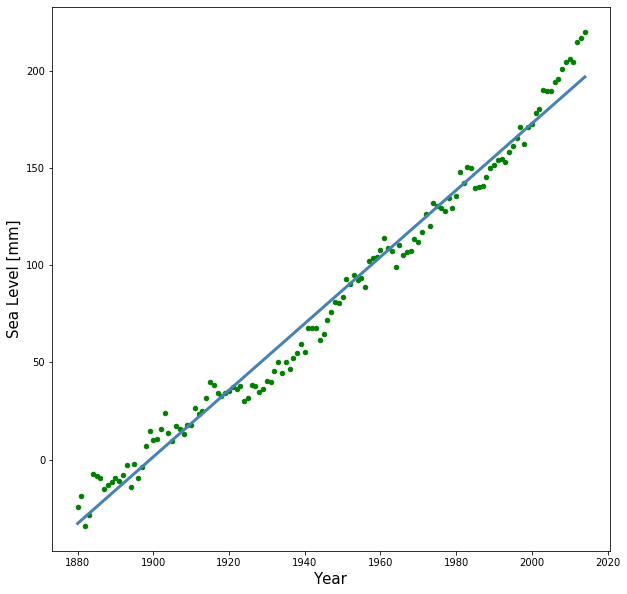

In [0]:
pred = result.predict(datahub)
ax = datahub.plot.scatter("year_int", "minlev_mm", color="green", figsize=(10, 10))
ax.plot(datahub["year_int"], pred, color="steelblue", lw=3)
ax.set_xlabel("Year", fontsize=15)
ax.set_ylabel("Sea Level [mm]", fontsize=15)

**Describe what information is conveyed by this plot.**

This graph shows the OLS Regression result of the sea level (millimeters) change between the years 1880 and 2020 at 20-year intervals. The horizontal axis (x-axis) shows years from 1880 to over 2020. The vertical axis (y-axis) represents sea level (millimeters). From the graph, a linear line clearly shows that the sea level has been increased by years.   

**Would you consider this model a "good" fit to the data?  Why or why not?**

Yes, I would consider this model a "good" fit to the data. It is because R-squared shows 0.983 in the table above, which implies that 98.3% of the variation in the Sea Level data is due to variation in the Year data.   

** The R-squared indicates the percentage of the variance in the dependent variable that the independent variables explain collectively so that it means a goodness-of fit measure for linear regression models.   

### PART 4 - Comparing Multiple Model Predictions

Let's expand the model that we're using to fit the data by adding a quadratic term.  In this part, you will compare the two model fits and use each to predict when Newcastle Battery Park will be under water due to rising sea level.

**Using the statsmodels api, fit a model to the CSIRO data that includes both a linear and quadratic dependence on time.**

In [0]:
import numpy as np

# -- build the quadratic model
model2 = sm.ols("minlev_mm ~ np.power(year_int, 2) + year_int", data=datahub)

# -- now fit the model to the data
result2 = model2.fit()

# -- summarize the fit
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:              minlev_mm   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     7146.
Date:                Wed, 15 Jan 2020   Prob (F-statistic):          2.86e-135
Time:                        03:16:00   Log-Likelihood:                -443.15
No. Observations:                 135   AIC:                             892.3
Df Residuals:                     132   BIC:                             901.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.347e+

**Plot the CSIRO data with both the linear model and quadratic model overlaid.**

Text(0, 0.5, 'Sea Level [mm]')

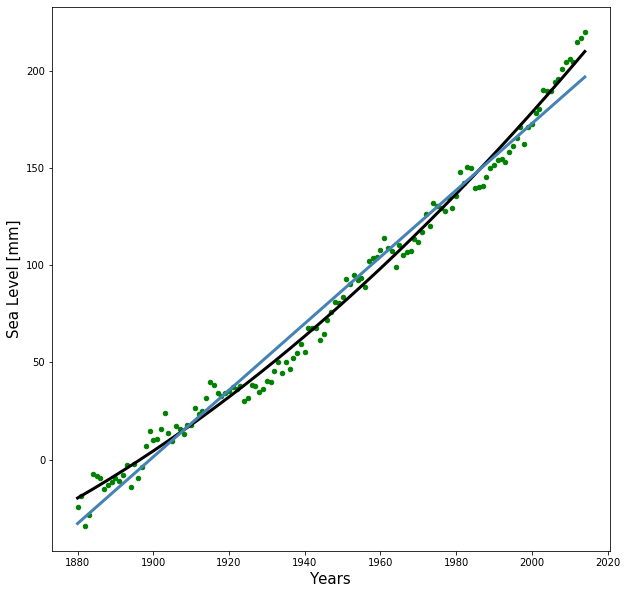

In [0]:
pred2 = result2.predict(datahub)
ax = datahub.plot.scatter("year_int", "minlev_mm", color="green", figsize=(10, 10))
ax.plot(datahub["year_int"], pred2, color="black", lw=3)
ax.plot(datahub["year_int"], pred, color="steelblue", lw=3)
ax.set_xlabel("Years", fontsize=15)
ax.set_ylabel("Sea Level [mm]", fontsize=15)


**Describe what information is conveyed by this plot.**

---
The quadratic dependence on time is reflected on the plot as the new information. This graph shows the OLS Regression result of the sea level (millimeters) change between the years 1880 and 2020 at 20-year intervals. The horizontal axis (x-axis) shows years from 1880 to over 2020. The vertical axis (y-axis) represents sea level (millimeters). From the graph, a blue line shows that the sea level has been increased by years by linear regression. Otherwise, a black linear line indicating the quadratic dependence on time shows values decrease and then increase. The R squared is 99% which means this model is more close to the real-world situations.


---



In [0]:
# Described above.

**Determine the probability that the quadratic model is a better fit to the data using a likelihood ratio test.**

In [0]:
lr, pval, ddof = result2.compare_lr_test(result)
print("p-value: {0}".format(round(pval, 3)))

p-value: 0.0


**Using Google Earth to determine the elevation of New Castle Battery Park, in what year will it be under water due to rising sea level?** 

In [0]:
# "Arbitrary" elevelation of Sea Level is -1 meter, which is 1000 millimeters
# "Arbitrary" elevelation of New Castle Battery Park is 1 meter, which is 1000 millimeters
# The toal amount is 2000 millimeters

# Predicting a value outisde the fit range
ext = result.predict({"year_int": 3066})
ext2 = result2.predict({"year_int":2442})

print("linear model extrapolation:")
print(ext)

print("")

print("quadratic model extrapolation")
print(ext2)


linear model extrapolation:
0    2000.685864
dtype: float64

quadratic model extrapolation
0    2005.561537
dtype: float64


**Summarize your findings throughout this notebook.  What are the key take aways from your analysis?  What are some of the shortcomings, potential biases, inaccuracies, assumptions, or approximations that you have made through out? (No more than 500 words)**

**Key points:** The main result of this analysis implies that the Sea Level (millimeters) has been increased by Years as the previous research stated in the background. The graphs above illustrate the sea level change between the years 1880 and 2020 at 20-year intervals. The horizontal axis (x-axis) shows years from 1880 to 2020. For the data source, the “CSIRO Adjusted Sea Level” and “NOAA Adjusted Sea Level” from CSIRO were used, and the linear model and quadratic model were used for this analysis. In both linear and quadratic model, the p-value shows 0.0. The p-value is the probability of obtaining the observed results of a test assuming the null hypothesis that the linear model is statistically preferable is correct. But R-squared in the quadratic model shows an increase as 99.1%, while R-squared in the linear model shows 98.3%. It indicates that the quadratic model fits better than the linear model. If the current rate of the sea level rise is being continued, we can predict that the Newark Castle Battery Park in Delaware will be under water due to rising sea level. According to the prediction model in this analysis, the linear model extrapolates that it will be sunk in 3066 and the quadratic model extrapolates that it will be sunk in 2442.   

**Shortcomings:** However, it has a shortcoming that it has the limited independent variables. First, this analysis only considered the sea level as dependent variable and time as independent variable. There can be more independent variables which are statistically significant to affect dependent variables. Second, the data source is limited to the CSIRO. This analysis used the aggregated the data from the CSIRO which used satellites, however it does not include other data measurement such as tide gauge records (Gornitz, 1995; IPCC, 2014).     

**Potential biases:** This analysis shows the similar prediction that the sea level will continue to rise well beyond 2010 as stated in the IPCC AR5 (IPCC, 2014). However, this analysis can be potential biased because of the limited independent variables and data source. 

**Inaccuracies:** Also, this analysis can be inaccurate based on the different characteristic numbers for sea level measurements over time based on the previous research (Cazenave and Nerem, 2004; Nerem et al., 2010). The author used the minimum data of “CSIRO Adjusted Sea Level” and “NOAA Adjusted Sea Level” in this analysis, therefore the result can be possibly inaccurate. 

**Assumptions:** In this analysis, the author assume that the elevation of Newark Castle Battle Park as 1 meter (1,000 millimeters) and the elevation of the sea level as – 1 meter (millimeters) based on the Google Earth. 

**Approximations:** Note that this analysis is only approximate; meaning that it is similar but not equal to the actual result. Prerequisite for the accurate approximations is a sufficient sample size of data. 


---

**EXTRA CREDIT - Local Effects**

Notice this image:

![alt text](https://md.water.usgs.gov/gage_images/01482170.JPG)

That is a picture of a tide gauge in New Castle Battery Park.  So far we've been using global sea level as a data set for predicting when Battery Park will be underwater, but the rate of sea level rise is known to vary with location.  The USGS provides data going back to 2012.  Using the New Castle tide gauge data available from USGS, how would your answers about when New Castle Battery Park will be underwater change?$^{\dagger}$

<small><i>$^{\dagger}$ Note, this "Extra Credit" section is significantly more tricky than the previous sections! </i></small>

---